# The Plan

- Get some data viz setup
- experiment with kalman filters
- mess with hotelling algos

In [1]:
# !pip install numpy

In [2]:
# imports
%matplotlib inline
!pip install banpei
!pip uninstall numpy --yes
!pip install numpy

import matplotlib
import pandas as pd
import numpy as np
import banpei
import matplotlib.pyplot as plt
print("complete")

Found existing installation: numpy 1.20.2
Uninstalling numpy-1.20.2:
  Successfully uninstalled numpy-1.20.2
  Using cached numpy-1.20.2-cp38-cp38-macosx_10_9_x86_64.whl (16.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.20.2 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you have scipy 1.6.3 which is incompatible.
complete


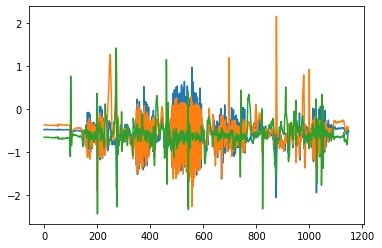

In [3]:
data = pd.read_csv('./data/LMT/accelerometer.csv')

# data.plot(x="epoc (ms)", y="x-axis (g)", color="red")
# data.plot(x="epoc (ms)", y="y-axis (g)", color="green")
# data.plot(x="epoc (ms)", y="z-axis (g)")
# plt.figure(figsize=(20,20))
plt.plot([x-1.4 for x in data["y-axis (g)"]])
plt.plot([x+0 for x in data["z-axis (g)"]])
plt.plot([x-0.5 for x in data["x-axis (g)"]])
plt.show()
# print(data)
# print(data["x-axis (g)"])

In [4]:
adata = pd.read_csv('./data/LMT/gyroscope.csv')

print(adata)

          epoc (ms)        timestamp (-0700)  elapsed (s)  x-axis (deg/s)  \
0     1620103102956  2021-05-03T21.38.22.956        0.000           1.037   
1     1620103102996  2021-05-03T21.38.22.996        0.040           1.037   
2     1620103103035  2021-05-03T21.38.23.035        0.079           0.244   
3     1620103103076  2021-05-03T21.38.23.076        0.120           0.366   
4     1620103103116  2021-05-03T21.38.23.116        0.160           0.976   
...             ...                      ...          ...             ...   
2299  1620103195480  2021-05-03T21.39.55.480       92.524           2.622   
2300  1620103195521  2021-05-03T21.39.55.521       92.565          -1.220   
2301  1620103195561  2021-05-03T21.39.55.561       92.605          -3.841   
2302  1620103195602  2021-05-03T21.39.55.602       92.646           2.988   
2303  1620103195641  2021-05-03T21.39.55.641       92.685           7.622   

      y-axis (deg/s)  z-axis (deg/s)  
0             -1.341          -0.366

In [10]:
# print(data["timestamp (-0700)"][102])
# print(data)

In [10]:
#x = data["x-axis (g)"] + data["y-axis (g)"] + data["z-axis (g)"]
x = data["x-axis (g)"]
y = data["y-axis (g)"]
z = data["z-axis (g)"]

model = banpei.Hotelling()

results_x = model.detect(x, 0.06)
results_y = model.detect(y, 0.06)
results_z = model.detect(z, 0.06)

results = [*results_x, *results_y, *results_z]
# print(results)
# data.plot(x="epoc (ms)", y="x-axis (g)", color="red")

45


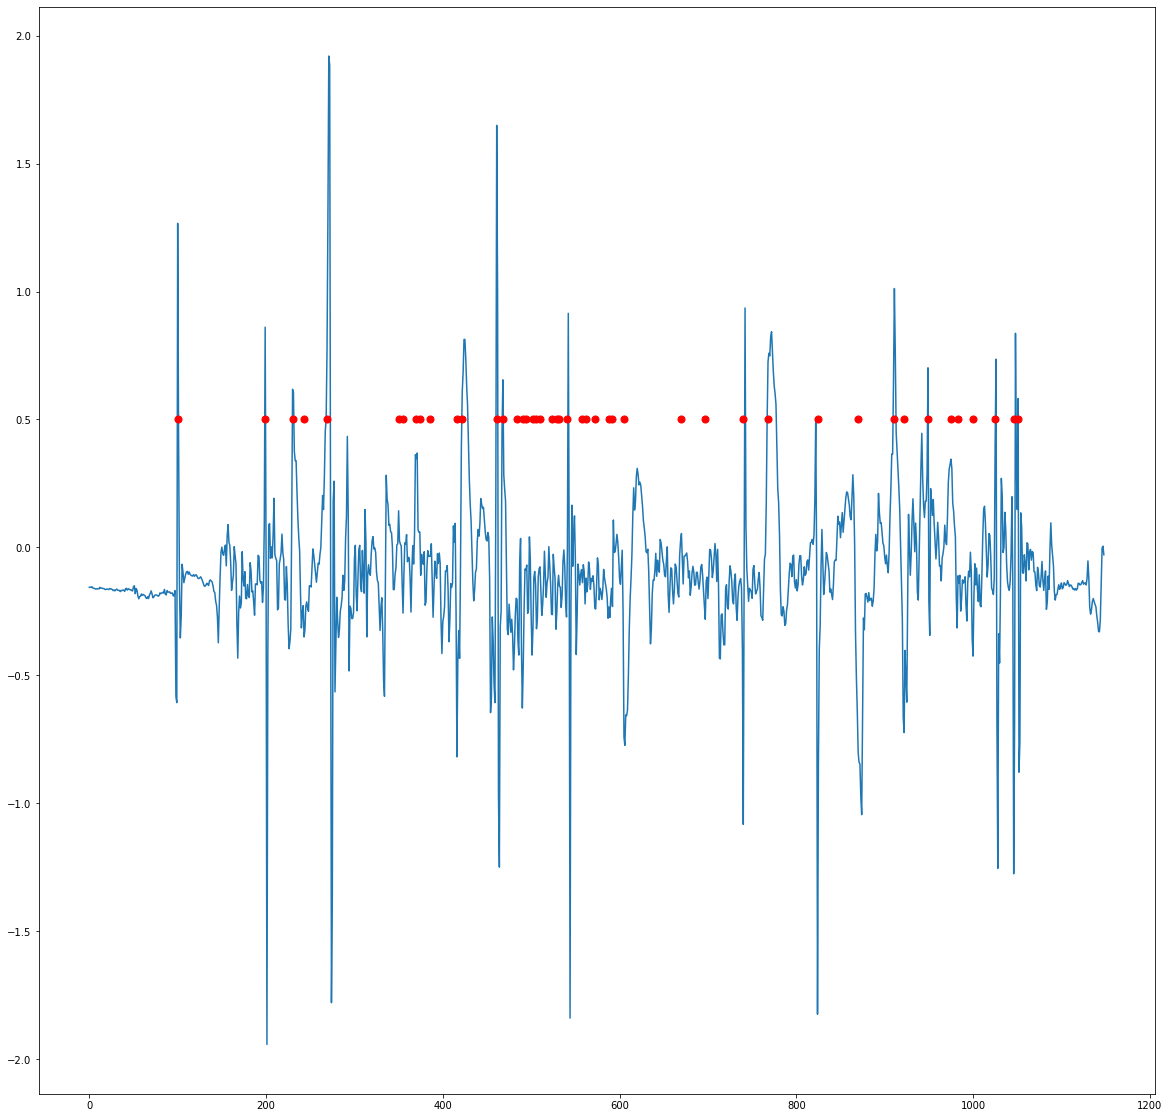

In [29]:
r = [x[0] for x in results]
r.sort()
fr = []

# get rid of detections from the same spike
for i in range(len(r)-1):
    if abs(r[i] - r[i-1]) > 2:
        fr.append(r[i])

print(len(fr))
plt.figure(figsize=(20,20))
plt.plot(x, zorder=-1)
plt.scatter(fr, [[0.5]*len(fr)], color="red", zorder=2, s=50)

# plt.show()

In [30]:
# (I'm assuming) the labels for the spikes
# Shouldn't this just be added into the datafile?
# ts = '''00:00:04.3
# 00:00:06.0
# 00:00:11.8
# 00:00:15.1
# 00:00:18.9
# 00:00:22.2
# 00:00:27.3
# 00:00:31.0
# 00:00:37.9
# 00:00:40.5
# 00:00:41.7
# 00:00:48.8
# 00:00:52.1
# 00:00:54.8
# 00:00:56.9
# 00:01:01.5
# 00:01:03.2
# 00:01:04.0
# 00:01:09.9
# 00:01:12.1
# 00:01:18.7
# 00:01:22.3
# 00:01:23.7'''.split("\n")


ts = '''00:00:08.2
00:00:14.0
00:00:21.7
00:00:29.1
00:00:35.7
00:00:45.8
00:00:48.1
00:00:51.8
00:00:58.4
00:01:02.5
00:01:11.0
00:01:12.5
00:01:14.6
00:01:16.6'''.split("\n")

# processing of the labels, converting them into seconds

def c_sec(time_str):
#     print(time_str)
    h, m, s = time_str[:-2].split(':')
    return int(h) * 3600 + int(m) * 60 + int(s) + data["elapsed (s)"][fr[0]]


ts = list(map(c_sec, ts))

# print(list(ts))

a = []
for i in fr:
    a.append(data["elapsed (s)"][i])
# print(a)
print(ts)



[16.05, 22.05, 29.05, 37.05, 43.05, 53.05, 56.05, 59.05, 66.05, 70.05, 79.05, 80.05, 82.05, 84.05]


45 14


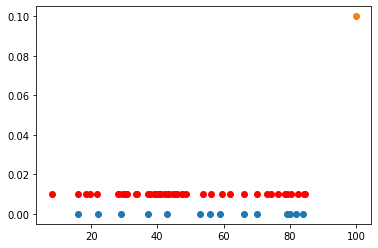

In [31]:
# print(len(ts))
# print(len(r))
print(len(a), len(ts))

plt.scatter(a, [0.01]*(len(a)), color="red")
plt.scatter(list(ts), [0]*len((ts)))

plt.scatter([100], [0.1])

As seen above, almost all of the spikes were detected, with a handful of double detections and missed detections.